# Transfer learning 

In [1]:
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [0]:
import pickle

In [0]:
# na komputerze
with open('./Dane2/bike_images.py', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [0]:
!tar -xvf ./Dane2/bike_data.tar.gz

from glob import glob
from skimage.io import imread
import numpy as np
glob('./bike_data_test/*')

def load_data(directory):
    subdirs = glob('%s/*' % directory)
    datas = []
    labels = []
    for i, subdir in enumerate(subdirs):
        files = glob('%s/*' % subdir)
        for f in files:
            datas.append(imread(f))
            labels.append(i)
    return np.array(datas), np.array(labels)

X_train, y_train = load_data('./bike_data_train')
X_test, y_test = load_data('./bike_data_test')

In [0]:
# w google drive
from google.colab import files

uploaded = files.upload()

!tar -xvf bike_data.tar.gz

from glob import glob
from skimage.io import imread
import numpy as np
glob('./bike_data_test/*')

def load_data(directory):
    subdirs = glob('%s/*' % directory)
    datas = []
    labels = []
    for i, subdir in enumerate(subdirs):
        files = glob('%s/*' % subdir)
        for f in files:
            datas.append(imread(f))
            labels.append(i)
    return np.array(datas), np.array(labels)

X_train, y_train = load_data('./bike_data_train')
X_test, y_test = load_data('./bike_data_test')

In [7]:
! ls

bike_data.tar.gz  bike_data_test  bike_data_train  sample_data


### Very small dataset

In [53]:
X_train.shape

(309, 224, 224, 3)

In [54]:
X_test.shape

(87, 224, 224, 3)

### 4 typesof motorbikes to recognize

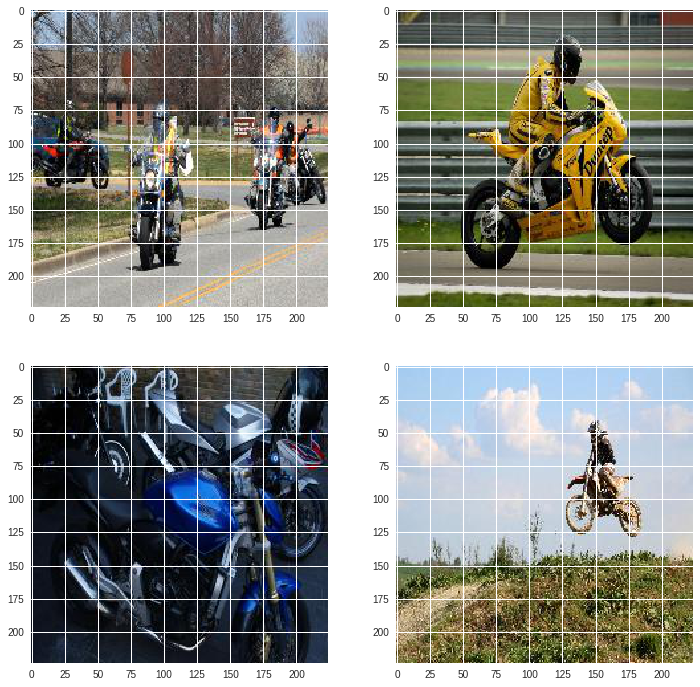

In [57]:
ind = 2
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(X_train[y_train == 0][ind])
plt.subplot(2,2,2)
plt.imshow(X_train[y_train == 1][ind])
plt.subplot(2,2,3)
plt.imshow(X_train[y_train == 2][ind])
plt.subplot(2,2,4)
plt.imshow(X_train[y_train == 3][ind])
plt.show()

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [12]:
X_train.shape

(309, 224, 224, 3)

Important: we have to know standarization which was applied while model learning 

In [0]:
X_train = (X_train - np.array([103.94,116.78,123.68])) * 0.017 

In [14]:
X_train.min()

-2.1025600000000004

In [15]:
X_train.max()

2.56802

In [0]:
X_test = (X_test - np.array([103.94,116.78,123.68])) * 0.017 

In [0]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
X_train_g, X_valid_g, y_train_g, y_valid_g = train_test_split(X_train, y_train, test_size=0.25)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

### Try LeNet model

In [19]:
model = Sequential()
model.add(Conv2D(6,(5,5),activation='relu',input_shape = (224,224,3),padding='valid'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(5,5),activation='relu',padding='valid'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
early_stopping = EarlyStopping(patience=5)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 6)       456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 6)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 16)      2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 53, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 44944)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               5393400   
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [20]:
take_best_model = ModelCheckpoint('./wagi_lanet.h5',save_best_only=True)
model.fit_generator(
    datagen.flow(X_train_g,y_train_g,batch_size=32),
    validation_data = (X_valid_g,y_valid_g),
    epochs = 30,steps_per_epoch = X_train_g.shape[0]//32,
    callbacks=[take_best_model]
)


Epoch 1/30
7/7 [==============================] - 4s 571ms/step - loss: 3.2277 - acc: 0.2769 - val_loss: 1.4321 - val_acc: 0.2436
Epoch 2/30
7/7 [==============================] - 2s 318ms/step - loss: 1.4640 - acc: 0.3083 - val_loss: 1.4824 - val_acc: 0.4872
Epoch 3/30
7/7 [==============================] - 3s 372ms/step - loss: 1.3584 - acc: 0.3819 - val_loss: 1.3397 - val_acc: 0.3590
Epoch 4/30
7/7 [==============================] - 3s 417ms/step - loss: 1.2741 - acc: 0.4420 - val_loss: 1.4152 - val_acc: 0.3590
Epoch 5/30
7/7 [==============================] - 3s 382ms/step - loss: 1.3765 - acc: 0.2682 - val_loss: 1.3252 - val_acc: 0.3205
Epoch 6/30
7/7 [==============================] - 2s 342ms/step - loss: 1.2587 - acc: 0.3704 - val_loss: 1.2680 - val_acc: 0.3077
Epoch 7/30
7/7 [==============================] - 3s 417ms/step - loss: 1.2232 - acc: 0.4107 - val_loss: 1.1746 - val_acc: 0.5385
Epoch 8/30
7/7 [==============================] - 3s 369ms/step - loss: 1.1878 - acc: 0.45

In [0]:
model.load_weights('./wagi_lanet.h5')

In [22]:
print(model.evaluate(X_train,y_train))
print(model.evaluate(X_test,y_test))

309/309 [==============================] - 1s 2ms/step
[0.9016470567693988, 0.6181229786965453]
87/87 [==============================] - 0s 3ms/step
[1.1730307148790908, 0.5747126443632717]


### Loading MobileNet model

In [0]:
from keras import applications

In [0]:
model_mobilenet = applications.MobileNet(input_shape=(224,224,3),include_top=False)

In [38]:
len(model_mobilenet.layers)

96

In [0]:
model_mobilenet.summary()

In [40]:
np.array([layer.trainable for layer in model_mobilenet.layers])

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [0]:
for layer in model_mobilenet.layers[:-20]:
  layer.trainable = False # zamrożenie początkowych warstw modelu

In [42]:
np.array([layer.trainable for layer in model_mobilenet.layers])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [0]:
model_stacked = Sequential()
model_stacked.add(model_mobilenet)
model_stacked.add(Flatten())
model_stacked.add(Dense(512,activation='relu'))
model_stacked.add(Dropout(0.5))
model_stacked.add(Dense(128,activation='relu'))
model_stacked.add(Dense(4,activation='softmax'))

model_stacked.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='sgd')

early_stoping = EarlyStopping(patience=3)
save_best_model = ModelCheckpoint('./model_stacked.h5',save_best_only=True)

In [44]:
model_stacked.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_3 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               25690624  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 516       
Total params: 28,985,668
Trainable params: 27,619,460
Non-trainable params: 1,366,208
________________________________________________________

In [45]:
model_stacked.fit_generator(
    datagen.flow(X_train_g,y_train_g,batch_size=32),
    validation_data = (X_valid_g,y_valid_g),
    epochs=30,steps_per_epoch = X_train_g.shape[0]//32,
    callbacks=[save_best_model]
)

Epoch 1/30
7/7 [==============================] - 7s 987ms/step - loss: 10.3479 - acc: 0.2321 - val_loss: 8.0503 - val_acc: 0.2949
Epoch 2/30
7/7 [==============================] - 3s 483ms/step - loss: 10.9686 - acc: 0.2633 - val_loss: 11.7786 - val_acc: 0.2692
Epoch 3/30
7/7 [==============================] - 3s 392ms/step - loss: 10.8819 - acc: 0.2315 - val_loss: 12.2687 - val_acc: 0.2308
Epoch 4/30
7/7 [==============================] - 3s 426ms/step - loss: 5.3278 - acc: 0.3676 - val_loss: 2.0213 - val_acc: 0.4359
Epoch 5/30
7/7 [==============================] - 3s 425ms/step - loss: 2.0628 - acc: 0.4227 - val_loss: 1.8837 - val_acc: 0.2949
Epoch 6/30
7/7 [==============================] - 3s 452ms/step - loss: 1.6376 - acc: 0.4412 - val_loss: 1.1126 - val_acc: 0.5641
Epoch 7/30
7/7 [==============================] - 3s 443ms/step - loss: 1.3931 - acc: 0.4824 - val_loss: 1.1526 - val_acc: 0.4744
Epoch 8/30
7/7 [==============================] - 3s 479ms/step - loss: 1.2646 - acc:

In [0]:
from tensorflow import set_random_seed

In [0]:
model_stacked.load_weights('./model_stacked.h5')

In [46]:
print(model_stacked.evaluate(X_train,y_train))
print(model_stacked.evaluate(X_test,y_test))

309/309 [==============================] - 2s 6ms/step
[0.40983912850275006, 0.8543689324246255]
87/87 [==============================] - 1s 6ms/step
[0.6069898694411091, 0.8045977045749796]
